# Information
- Truc Huynh
- AI Academy

# Project Description

This exercise has two parts. First you will import and then create a network graph to represent the data. Next you will create a program that utilizes the data.

### Requirement: 
Do not use any additional Python libraries with the exception of matplotlib and networkx.

- [matplotlib](https://matplotlib.org/stable/plot_types/index.html)
- [networkx](https://networkx.org/documentation/stable/tutorial.html#attributes)
- [shortest path function & length using networkx](https://networkx.org/documentation/stable/reference/algorithms/shortest_paths.html)

#### Part 1

- Write Python code to complete the following:
- Load in the attached plain text file and generate a unique class RoadDict that uses a dictionary representation to store all of the roads in the file.  Each line has a starting city, ending city, and distance in miles.
- Define a new CityGraph class that stores the road network using a networkx graph structure and use it to print a graph of the cities. Example output shown below in Figure 1.

#### Part 2
Using the data imported in Part 1, write Python code to complete the following:

##### Inputs
Ask for a start and end city from the user.

##### Outputs
- Perform a breadth first search on the graph and return the path found (intermediate cities) along with the miles traversed.
- Perform a depth first search on the graph and return the path found along with the miles traversed. 

In [1]:
# Required library

import matplotlib.pyplot as plt
import networkx as nx

In [2]:
"""
# openfile read input from textfile
# In fact, I test the data on different jupiter notebook and come up with the shortest version
"""


def openfile(filename):
    with open(filename, "r") as file_reader:
        all_lines = file_reader.readlines()
    return all_lines

In [3]:
"""
create_data(data): take parameter data, remove all the newline, space and then convert each line to a tuple
create RoadDict dictionary and list of tuple clean_data
"""


def create_data(data):
    clean_data = []
    road_dict = {}
    count = 0
    # Clean the data by using for loop
    for line in data:
        line = line.replace('\n', '').replace(' ', '').split(',')
        road_dict[count] = {'citi1': line[0], 'citi2': line[1], 'distance': line[2]}
        clean_data.append((line[0], line[1], float(line[2])))
        count += 1
    return clean_data, road_dict

In [4]:
"""
Simple get the input from user, and validation, to make sure it not crash the application
"""


def get_user_input(cities, purpose):
    user_input = input(f"Please enter the {purpose} city: ").capitalize()
    while user_input not in cities:
        cities_display(cities)
        user_input = input(f"Please enter the {purpose} city again: ").capitalize()

    return user_input

In [5]:
"""
Print out the cities in the list
"""


def cities_display(cities):
    print("Target city and Destination city must be:")
    for citi in cities:
        print(citi, end=', ')

    print('')

## Bread First Search Function
Implement bread first search algorithm to find the shotest path between 2 cities

In [6]:
"""
bread_first_search_graph(graph, start, end)
measure the shortest path between 2 cities
+ start is the name of start citi
+ end is the destination citi
+ graph is the adjency graph
"""

def bread_first_search_graph(graph, start, end):
    explored = []
     
    # Using a queue to tempolary store the path
    queue = [[start]]
     
    if start == end:
        print("Same citi are being search!")
        return start
     
    # while queue has note
    while queue:
        path = queue.pop(0)
        node = path[-1]
         
        # Condition to check if the current node is not visited
        if node not in explored:
            neighbours = graph[node]
             
            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)
                 
                # Arrived at destination:
                if neighbour == end:
                    return new_path
            explored.append(node)

    print("No connection between 2 cities")

## Depth First Traverse
I was not able to implement the depth first search to solve this problem. I would be able to implement the A* Search (Google), the Bellman Algorithm or the Dijkstra Algorithm, but I run out of time at this point so I just implement Depth First Traverse for the Depth First Search

In [7]:
# Implement the dept first search to travel the whole graph

def dept_first_search_graph(graph, start, visited):
    if start not in visited:
        visited.append(start)
        for k in graph[start]:
            dept_first_search_graph(graph, k, visited)
            
    return visited

## Function measure the distance(length) between 2 cities

In [8]:
"""
Function to measure distance between 2 cities
"""


def distance_length(graph, start, end, graph_data):
    shortest_pair_cities=[]
    total=0
    
    # return if same citi are being search
    if start == end:
        print("Same citi are being search!")
        return 0
    
    # find the shortest path between 2 citi
    explored = bread_first_search_graph(adjacency_dict, start, end)
    
    # generate the pairs of data so that we can find the distance later
    for index in range(1,len(explored)):
        shortest_pair_cities.append([explored[index-1],explored[index]])
    
    # get the distance from the tupple 
    for pair in shortest_pair_cities:
        for data in graph_data:
            if pair[0] in data and pair [1] in data:
                total += data[2]

    return total

### Data Preparation:


In [9]:
# Data Preparation:
# create RoadDict as requirement and graph_data to feed in networkx to create graphs
graph_data, road_dict= create_data(openfile("frenchcities.txt"))
# create multi graph using networkx
multi_graph = nx.MultiGraph()
multi_graph.add_weighted_edges_from(graph_data)

# Convert the graph to dictionary with weight
multi_graph_dict = dict(multi_graph.degree(weight='weight'))

# create the city list for validation only
cities_list = list(multi_graph_dict)

# create a list of pair
list_of_pair = []
for data in graph_data:
    list_of_pair.append([data[0],data[1]])

## Create the adjacency dictionary

In [10]:
"""
adjacency_dict is important as we use it through the programs for shortest path
"""
# Create the adjacency dictionary:
adjacency_dict = {}

for citi in cities_list:
    # create a new dependancy for each citi
    adjacency_dict[citi] = []
    
    for pair in list_of_pair:
        # if the citi is not is not in the pair
        if citi not in pair:
            pass
        else:
            # iterate through each citi pair
            for data in pair:
                # if the citi in pair is the key of the dictinary: pass
                if citi == data:
                    pass
                else:
                    # else append the found citi to the adjacency list
                    adjacency_dict[citi].append(data)

### Data Validation

In [11]:
# print(adjacency_dict) for graph traverse
for citi in adjacency_dict:
    print(citi,':',adjacency_dict[citi])

Brest : ['Rennes']
Rennes : ['Brest', 'Nantes', 'Paris', 'Caen']
Nantes : ['Rennes', 'Limoges', 'Bordeaux']
Paris : ['Rennes', 'Limoges', 'Caen', 'Calais', 'Nancy', 'Dijon']
Caen : ['Rennes', 'Paris', 'Calais']
Limoges : ['Nantes', 'Paris', 'Lyon', 'Toulouse', 'Bordeaux']
Bordeaux : ['Nantes', 'Limoges', 'Toulouse']
Lyon : ['Limoges', 'Dijon', 'Grenoble', 'Avignon']
Toulouse : ['Limoges', 'Bordeaux', 'Montpellier']
Calais : ['Paris', 'Caen', 'Nancy']
Nancy : ['Paris', 'Calais', 'Strasbourg', 'Dijon']
Dijon : ['Paris', 'Nancy', 'Strasbourg', 'Lyon']
Strasbourg : ['Nancy', 'Dijon']
Montpellier : ['Toulouse', 'Avignon']
Avignon : ['Montpellier', 'Lyon', 'Grenoble', 'Marseille']
Grenoble : ['Lyon', 'Avignon']
Marseille : ['Avignon', 'Nice']
Nice : ['Marseille']


In [12]:
# the road_dictionay store the road dict
for road in road_dict:
    print(road, road_dict[road])

0 {'citi1': 'Brest', 'citi2': 'Rennes', 'distance': '244'}
1 {'citi1': 'Rennes', 'citi2': 'Nantes', 'distance': '107'}
2 {'citi1': 'Rennes', 'citi2': 'Paris', 'distance': '348'}
3 {'citi1': 'Rennes', 'citi2': 'Caen', 'distance': '176'}
4 {'citi1': 'Nantes', 'citi2': 'Limoges', 'distance': '329'}
5 {'citi1': 'Nantes', 'citi2': 'Bordeaux', 'distance': '329'}
6 {'citi1': 'Limoges', 'citi2': 'Paris', 'distance': '396'}
7 {'citi1': 'Limoges', 'citi2': 'Lyon', 'distance': '389'}
8 {'citi1': 'Limoges', 'citi2': 'Toulouse', 'distance': '313'}
9 {'citi1': 'Limoges', 'citi2': 'Bordeaux', 'distance': '220'}
10 {'citi1': 'Paris', 'citi2': 'Caen', 'distance': '241'}
11 {'citi1': 'Paris', 'citi2': 'Calais', 'distance': '297'}
12 {'citi1': 'Paris', 'citi2': 'Nancy', 'distance': '372'}
13 {'citi1': 'Paris', 'citi2': 'Dijon', 'distance': '313'}
14 {'citi1': 'Caen', 'citi2': 'Calais', 'distance': '120'}
15 {'citi1': 'Calais', 'citi2': 'Nancy', 'distance': '534'}
16 {'citi1': 'Nancy', 'citi2': 'Strasbour

In [13]:
# graph data store the road length between 2 citi (edge)
for data in graph_data:
    print(data)

('Brest', 'Rennes', 244.0)
('Rennes', 'Nantes', 107.0)
('Rennes', 'Paris', 348.0)
('Rennes', 'Caen', 176.0)
('Nantes', 'Limoges', 329.0)
('Nantes', 'Bordeaux', 329.0)
('Limoges', 'Paris', 396.0)
('Limoges', 'Lyon', 389.0)
('Limoges', 'Toulouse', 313.0)
('Limoges', 'Bordeaux', 220.0)
('Paris', 'Caen', 241.0)
('Paris', 'Calais', 297.0)
('Paris', 'Nancy', 372.0)
('Paris', 'Dijon', 313.0)
('Caen', 'Calais', 120.0)
('Calais', 'Nancy', 534.0)
('Nancy', 'Strasbourg', 145.0)
('Nancy', 'Dijon', 201.0)
('Dijon', 'Strasbourg', 335.0)
('Bordeaux', 'Toulouse', 253.0)
('Toulouse', 'Montpellier', 240.0)
('Montpellier', 'Avignon', 121.0)
('Dijon', 'Lyon', 192.0)
('Lyon', 'Grenoble', 104.0)
('Lyon', 'Avignon', 216.0)
('Avignon', 'Grenoble', 227.0)
('Avignon', 'Marseille', 99.0)
('Marseille', 'Nice', 188.0)


## Functional testing

In [14]:
# Using our self made fuction to find the shotest path
bread_first_search_graph(adjacency_dict, 'Nantes', 'Nice')


['Nantes', 'Limoges', 'Lyon', 'Avignon', 'Marseille', 'Nice']

In [15]:
# using networkx to validate the result (dijkstra Algorithm)
nx.dijkstra_path(multi_graph, 'Nantes', 'Nice')

['Nantes', 'Limoges', 'Lyon', 'Avignon', 'Marseille', 'Nice']

In [16]:
# using networkx to validate the result (bellman_Ford Algorithm)
nx.bellman_ford_path(multi_graph, 'Nantes', 'Nice')

['Nantes', 'Limoges', 'Lyon', 'Avignon', 'Marseille', 'Nice']

In [17]:
distance_length(adjacency_dict, 'Nantes', 'Nice', graph_data)

1221.0

In [18]:
# Depth first traverse
print(f"Depth First Search Traverse: {dept_first_search_graph(adjacency_dict,'Brest', [])}")

Depth First Search Traverse: ['Brest', 'Rennes', 'Nantes', 'Limoges', 'Paris', 'Caen', 'Calais', 'Nancy', 'Strasbourg', 'Dijon', 'Lyon', 'Grenoble', 'Avignon', 'Montpellier', 'Toulouse', 'Bordeaux', 'Marseille', 'Nice']


### Task 1: Draw Graph

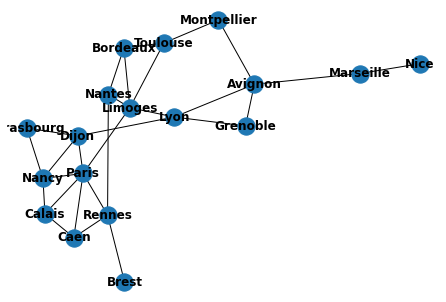

In [19]:
# Task 1: print out the data
nx.draw(multi_graph, with_labels=True, font_weight='bold')
plt.show()

### Task 2:
- breadfirst search and depth first search

In [20]:
# Task 2:
cities_display(cities_list)
target = get_user_input(cities_list, "target")
destination = get_user_input(cities_list, "destination")

# Using Kilometer because it is the standard measurement in France:

# Searching using Bread First Search
print(f"BFS: Cities need to travel: {bread_first_search_graph(adjacency_dict, target, destination)}, "
        f"total distance: {distance_length(adjacency_dict, target, destination, graph_data)} Km")


Target city and Destination city must be:
Brest, Rennes, Nantes, Paris, Caen, Limoges, Bordeaux, Lyon, Toulouse, Calais, Nancy, Dijon, Strasbourg, Montpellier, Avignon, Grenoble, Marseille, Nice, 
Please enter the target city: nice
Please enter the destination city: paris
BFS: Cities need to travel: ['Nice', 'Marseille', 'Avignon', 'Lyon', 'Limoges', 'Paris'], total distance: 1288.0 Km
